# DM890 Assignment 1


---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use you a account for coding on Colab and Google Drive to save your results.


## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip
    pip --version
    pip -V
```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'assignment1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [2]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Replace '------' with the path such that "DM890_assignment_1" is your working directory
cd '/content/gdrive/My Drive/------'

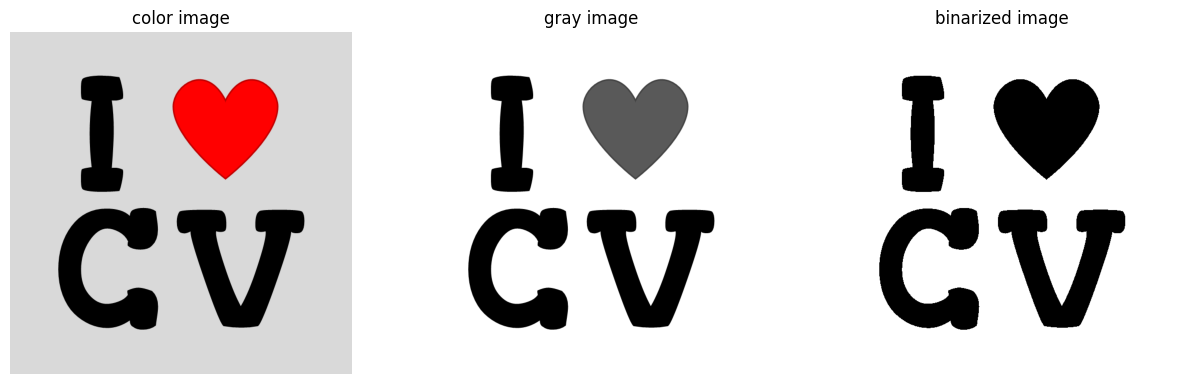

In [3]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Start of Assignment1
---
This assignment is divided into two parts each carrying equal weightage of points (pts). 


## Problem Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** at the end of this file. They are important.

## Problems
---

- **Problem 1. Gaussian filter {20 pts}:** 

  (a) Write a function that takes two arguments, a width parameter and a sigma parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5x5 Gaussian kernel of sigma=1 and a 11x11 Gaussian kernel of sigma=2. There will be four output images from this problem, namely, image convolved with 5x5, and 11x11, noisy image convolved with 5x5, and 11x11. 

  (b) Write a function that takes an image and its noisy version, and return the Peak Signal-to-Noise Ratio (PSNR) value. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need to do convertion between different data types.

  Once you fill in and run the codes, the outputs will be saved under `Results` folder. Also images will be displayed in the notebook with PSNR marked in the titles. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. The grading for this question will be based on the ground-truth PSNR and your results.

  Lena image is credit to https://www.ece.rice.edu/~wakin/images/.

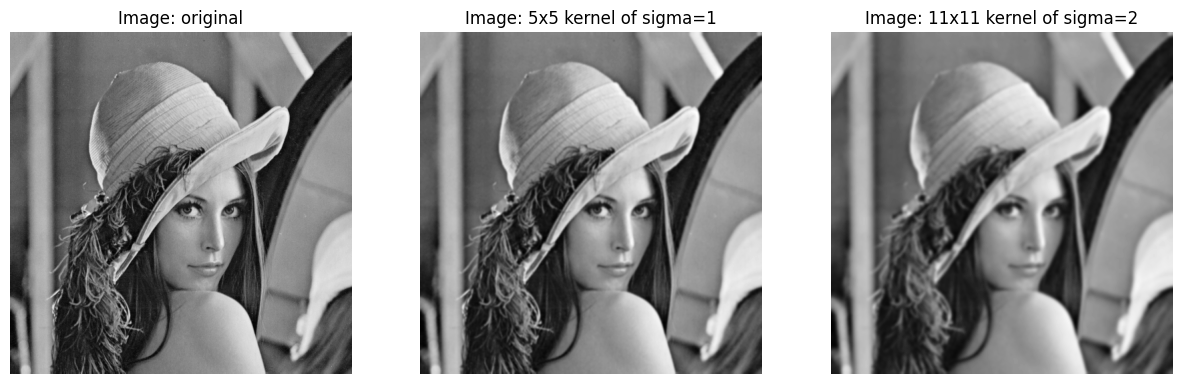

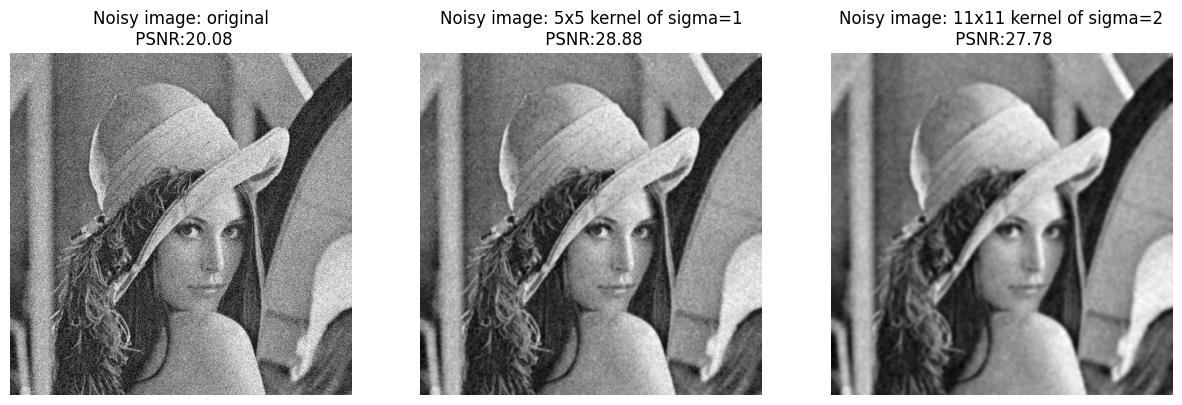

In [34]:
def genGaussianKernel(width, sigma):    
    ##########--WRITE YOUR CODE HERE--##########
    gaussian = np.zeros((width,width))
    for i in range(0,width):
        for j in range(0,width):
            gaussian[i,j] = (1/(2*np.pi*sigma**2)) * np.e**(-((i-width//2)**2+(j-width//2)**2)/(2*sigma**2))
    kernel_2d = gaussian/np.sum(gaussian)
    ##########-------END OF CODE-------##########
    return kernel_2d

def PSNR(img, img_noise):
    ##########--WRITE YOUR CODE HERE--##########
    MAX_I = 255
    INE = 1/(len(img)*len(img[0]))
    MSE = 0
    for i in range(0,len(img)):
        for j in range(0,len(img[0])):
            MSE+=(float(img[i,j]) - float(img_noise[i,j]))**2
    MSE*=INE
    PSNR = 20*np.log10(MAX_I) - 10*np.log10(MSE)
    ##########-------END OF CODE-------##########
    return PSNR
 
# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32)/255.
    noise = np.random.normal(mean, std, img.shape)
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise*255).astype(np.uint8)
    return img_noise

# Load images
img = cv2.imread('SourceImages/lena512.bmp', 0)

# Add Gaussian Noise
img_gnoise = addGaussianNoise(img, 0, 0.1)
PSNR_img_gnoise = PSNR(img, img_gnoise)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)  # 5x5 kernel of sigma=1
kernel_2 = genGaussianKernel(11, 2)  # 11x11 kernel of sigma=2

# Convolve kernel with (noisy) image
img_kernel1 = cv2.filter2D(img, -1, kernel_1)
img_kernel2 = cv2.filter2D(img, -1, kernel_2)
img_gnoise_kernel1 = cv2.filter2D(img_gnoise, -1, kernel_1)
img_gnoise_kernel2 = cv2.filter2D(img_gnoise, -1, kernel_2)

PSNR_img_gnoise_kernel1 = PSNR(img, img_gnoise_kernel1)
PSNR_img_gnoise_kernel2 = PSNR(img, img_gnoise_kernel2)

# Write result images
if not os.path.exists("Results"):
  os.makedirs("Results")
cv2.imwrite("Results/P1_01.jpg", img_kernel1)
cv2.imwrite("Results/P1_02.jpg", img_kernel2)
cv2.imwrite("Results/P1_03.jpg", img_gnoise_kernel1)
cv2.imwrite("Results/P1_04.jpg", img_gnoise_kernel2)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_kernel1, 'gray')
plt.title('Image: 5x5 kernel of sigma=1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_kernel2, 'gray')
plt.title('Image: 11x11 kernel of sigma=2')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noisy image: original\n PSNR:{0:.2f}'.format(PSNR_img_gnoise))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel of sigma=1\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel1))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_gnoise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel of sigma=2\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel2))
plt.axis("off")

plt.show()


- **Problem 2. Median filter {20 pts}:** \\
(a) Write a function to generate an image with salt and pepper noise. The function takes three arguments, the input image, the probability that a pixel location has salt-pepper noise and a random seed for repitability. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform and np.random.choice**) 

 (b) Write a function to implement a median filter. The function takes two arguments, an image and a window size (if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result. (**Hint: Use cv2.copyMakeBorder to add borders**)  

 You need to generate two noisy images corrupted by salt-and-pepper noise with noise probability equals 0.1 and 0.2. And then use median filter of window size=5 to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as higher PSNR as possible. Fill in all the missing parts and do not modify others.

In [ ]:
# Function to generate image with salt and pepper noise
def addSaltPepperNoise(img, prob = 0.1, seed=0):
  # suppose the input image is 2D gray image
  # with probability=prob each pixel is replaced with a pepper(0)
  # or a salt(255) in equal chance
  np.random.seed(seed)  
  ##########--WRITE YOUR CODE HERE--##########



  ##########-------END OF CODE-------##########
  return img_noise
  
# Function to apply median filter (window size kxk) on the input image  
def medianFilter(img, window_size = 5):
  ##########--WRITE YOUR CODE HERE--##########  



  ##########-------END OF CODE-------##########
  return img_filtered
  
img_spnoise_p1 = 
PSNR_img_spnoise_p1 = 

img_spnoise_p1_MedianFilter =
PSNR_img_spnoise_p1_MedianFilter = 

img_spnoise_p2 = 
PSNR_img_spnoise_p2 = 

img_spnoise_p2_MedianFilter = 
PSNR_img_spnoise_p2_MedianFilter = 

# Generate Gaussian kernels
kernel_1 =  
kernel_2 = 

# Convolve filters with image and noisy image
img_spnoise_p1_GaussianFilter = cv2.filter2D(img_spnoise_p1, -1, kernel_1)
PSNR_img_spnoise_p1_GaussianFilter = PSNR(img, img_spnoise_p1_GaussianFilter)

img_spnoise_p2_GaussianFilter = cv2.filter2D(img_spnoise_p2, -1, kernel_2)
PSNR_img_spnoise_p2_GaussianFilter = PSNR(img, img_spnoise_p2_GaussianFilter)

cv2.imwrite("Results/P1_05.jpg", img_spnoise_p1_MedianFilter)    
cv2.imwrite("Results/P1_06.jpg", img_spnoise_p1_GaussianFilter)    
cv2.imwrite("Results/P1_07.jpg", img_spnoise_p2_MedianFilter)    
cv2.imwrite("Results/P1_08.jpg", img_spnoise_p2_GaussianFilter)  

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p1, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p1_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p1_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_GaussianFilter))
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p2, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p2_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p2_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.2)\n PSNR:{0:.2f}'
                  .format(PSNR_img_spnoise_p2_GaussianFilter))
plt.axis("off")

plt.show()

- **Problem 3. Separable filters {20 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

In [ ]:
def genGausKernel1D(length, sigma):
    ##########--WRITE YOUR CODE HERE--##########    



    ##########-------END OF CODE-------##########
    return kernel_1d


# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x =  
kernel_y = 

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = 

# Convolve with img_gnoise
img_gnoise_kernel1d_x =  
img_gnoise_kernel1d_xy =  
img_gnoise_kernel2d = 

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel1d_x, 'gray')
plt.title('Noise image: Gaussian filter 1d (x)')
plt.axis("off")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise_kernel1d_xy, 'gray')
plt.title('Noise image: Gaussian filter 1d (x->y)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel2d, 'gray')
plt.title('Noise image: Gaussian filter 2d')
plt.axis("off")

# Compute the difference array here
img_diff =  np.abs((img_gnoise_kernel1d_xy.astype(np.float32)
       -img_gnoise_kernel2d.astype(np.float32))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(img_diff, 'gray', vmin=0, vmax=255)
plt.title('Difference image\n Max abs difference={0:d}'
                        .format(np.max(img_diff)))
plt.axis("off")
plt.show()

- **Problem 4. Difference of Gaussians {20 pts}:** Difference of Gaussians (DoG) is a feature enhancement algorithm. You can obtain a DoG by subtracting a Gaussian filter of sigma=K\*s from a Gaussian filter of sigma=s. In this question, we will use K=1.6 and sigma=2. Plot the DoG kernel using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of DoG. Include your code and results in your Colab Notebook file. Apply the filter to the noisy image generated in the previous question. 

In [ ]:
# Create your Gaussian kernel
Gaussian_kernel_1 = 
Gaussian_kernel_2 = 

# Create your Difference of Gaussian
DoG = 

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel_1, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 1')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Gaussian_kernel_2, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 2')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(DoG, interpolation='none', cmap=cm.jet)
plt.title('2D Difference of Gaussian')
plt.axis("off")

# Plot the 3D figure of DoG
##########--WRITE YOUR CODE HERE--##########



##########-------END OF CODE-------##########

img_gnoise_DoG = 

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_DoG, 'gray')
plt.title('Noise image: filtered with DoG')
plt.axis("off")

cv2.imwrite("Results/P3_01.jpg", img_gnoise_DoG);


- **Problem 5. Histogram equalization {20 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). The ground-truth image is credit to https://github.com/yinhaoz/denoising-fluorescence. It is a real Fluorescence Microscopy Image with three R/G/B channels. You need to transform it into HSV space before doing histogram equalization. There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

In [ ]:
def histogram_equalization(img):
    ##########--WRITE YOUR CODE HERE--##########    



    ##########-------END OF CODE-------##########
    return img_hist_eq

# Read in input images
imgB = cv2.imread('SourceImages/BPAE_Cells.png', cv2.IMREAD_COLOR)

# Histogram equalization
imgB_hist_eq = histogram_equalization(imgB)

# Plot results
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
plt.title('Image: original')
plt.axis("off")

# Plot results
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgB_hist_eq, cv2.COLOR_BGR2RGB))
plt.title('Image: histogram equalization')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P4_01.jpg", imgB_hist_eq);

## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) and the ***a copy paste of the Assignment solutions*** through ITSLearning. This pdf file should be named as **Surname_Givenname_SDU-ID_assignment*.pdf** (example: Jordan_Michael_jomi23_assignment1.pdf for this assignment). This pdf will be used for a similarity checking of your codes.

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SDU-ID_hw*.*** (example: Jordan_Michael_jomi23_assignment1 for this assignment) in your Google Drive with your account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SDU-ID_assignment1       
        |---SourceImages
        |---[Your_code].ipynb
```
Note that this folder should be in your Google Drive.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in ITSLearning. 

Regarding copy-pasting the assignment solutions, just copy-paste the code snippet you are writing in this Jupyter notebook. This generated pdf file will allow us to have access to your assignment solutions through the google shared link and perform a plagiarism checking on your designed solutions.

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SDU-ID_assignment1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on ITSLearning. Please ask questions on ITSLearning and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.
